In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

# molcluster
> A collection of tools to cluster molecules for cheminformatics applications.

## How to use

pip install molcluster

You can use any function to generate descriptors for the molecules in the dataset. For instance, we could use [Morgan fingerprints](https://pubs.acs.org/doi/10.1021/ci100050t) from [RDkit](https://www.rdkit.org/docs/GettingStartedInPython.html) to generate a vector of 1024 bits for each molecule. 

In [ ]:
#| hide
from rdkit import Chem
import numpy as np
import pandas as pd

In [ ]:
from molcluster.unsupervised_learning.clustering import KMeansClustering, HDBSCANClustering, ButinaClustering, HierarchicalClustering
from molcluster.unsupervised_learning.transform import UMAPTransform, PCATransform

2022-08-27 00:14:45.524471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-08-27 00:14:45.524531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
data = pd.read_csv('../data/fxa_processed.csv')

In [ ]:
X = np.array([Chem.AllChem.GetMorganFingerprintAsBitVect(x, radius=1024) for x in list(map(Chem.MolFromSmiles, data.processed_smiles.values))])

# Dimensionality reduction

## Principal component analysis (PCA)

In [ ]:
pca_reducer = PCATransform(X)

In [ ]:
pca_embeddings = pca_reducer.reduce(n_components=2)
pca_embeddings[0:5]

array([[1.21513293, 0.45870568],
       [1.44554407, 0.63347132],
       [1.51317977, 0.86823372],
       [3.77445719, 1.29622038],
       [3.65415942, 1.8048388 ]])

## UMAP

In [ ]:
umap_reducer = UMAPTransform(X)

In [ ]:
umap_embeddings = umap_reducer.reduce(n_neighbors=10, min_dist=0.25, metric='euclidean')
umap_embeddings[0:5]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


array([[ 4.9371557, 12.973072 ],
       [ 4.871474 , 12.888872 ],
       [ 4.8225975, 12.891677 ],
       [18.73431  ,  5.9136844],
       [20.586678 ,  6.8356805]], dtype=float32)

# Clustering

## Kmeans clustering with 10 clusters

In [ ]:
clustering_kmeans = KMeansClustering(X)
labels = clustering_kmeans.cluster(n_clusters=10)
labels[0:5]

array([8, 8, 8, 8, 8], dtype=int32)

### Using the elbow method to select the optimal number of clusters

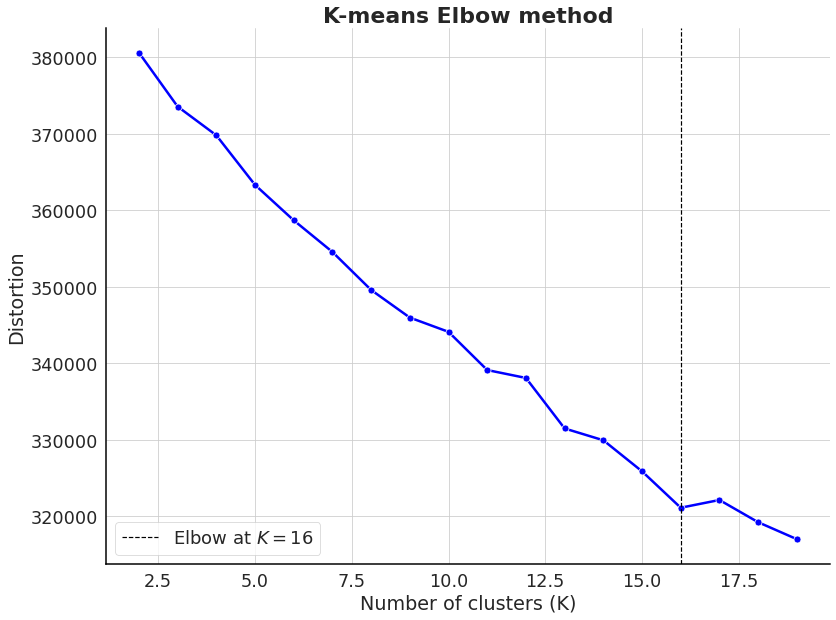

In [ ]:
clustering_kmeans.elbow_method(n_clusters=np.arange(2, 20))

## Butina clustering with similarity threshold > 0.7

In [ ]:
mol_list = data.processed_smiles.values

In [ ]:
clustering_butina = ButinaClustering(mol_list)
labels = clustering_butina.cluster(sim_cutoff=0.7)
labels[0:5]

Calculating Fingerprints:   0%|          | 0/3503 [00:00<?, ?it/s]

[34, 34, 34, 1, 131]

## HDBSCAN clustering

In [ ]:
clustering_hdbscan = HDBSCANClustering(X)
labels = clustering_hdbscan.cluster(min_cluster_size=5,min_samples=1,metric='euclidean')

In [ ]:
np.unique(labels)[0:5]

array([-1,  0,  1,  2,  3])

## Agglomerative clustering (e.g. using Ward's method)

In [ ]:
clustering_agg = HierarchicalClustering(X)
labels = clustering_agg.cluster(n_clusters=5, linkage='ward')
labels[0:5]

array([4, 4, 4, 2, 2])

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()